In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit import DataStructs
from rdkit import rdBase
from rdkit import RDConfig
from rdkit.Chem import ChemicalFeatures
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprint
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
from rdkit.Chem.Pharm2D import Gobbi_Pharm2D,Generate
from rdkit.Chem import rdMolDescriptors as rdescriptors
from rdkit.Chem import Descriptors

from sklearn import model_selection
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder,label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

RDKit WARNING: [00:58:09] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
Test_Size = 0.2

In [24]:
df = pd.read_csv('/home/is/mostatika-a/Balanced-SARS-CoV-2_pAC50.csv', index_col=0)

In [25]:
df

,pAC50,AC50(uM),Active,SMILES
EFFICACY,,,,
105.493143,8.00,0.100000,1,CC[C@H](NC(=O)[C@H](C[S+]([O-])(=O)CC1CC1)N[C@...
34.268972,7.95,0.112202,1,[H][C@@]1(C[C@H](C)[C@@]([H])(O1)[C@]2(CC)CC[C...
40.708548,7.90,0.125893,1,[H][C@@]1(C[C@H](C)[C@@]([H])(O1)[C@]2(CC)CC[C...
44.052835,7.90,0.125893,1,CC(C)CC(=O)O[C@H]\1C[C@@]2(COC(C)=O)[C@H](O[C@...
34.926175,7.85,0.141254,1,Clc2cc(ccc2NC(=O)c1cc(Cl)ccc1O)[N+]([O-])=O
...,...,...,...,...
0.000000,NaN,NaN,0,C[C@H](CO)C/1=C(O)/C(=O)[C@@]2(C)C/C=C(C)/CC/C...
0.000000,NaN,NaN,0,C[C@H](CO)NC1=C(C=C2CCC(=O)NC2=C1)[S+]([O-])(=...
0.000000,NaN,NaN,0,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O


In [26]:
df['molecules'] = df.SMILES.apply(Chem.MolFromSmiles)

In [27]:
df

,pAC50,AC50(uM),Active,SMILES,molecules
EFFICACY,,,,,
105.493143,8.00,0.100000,1,CC[C@H](NC(=O)[C@H](C[S+]([O-])(=O)CC1CC1)N[C@...,<rdkit.Chem.rdchem.Mol object at 0x7efc51a31d00>
34.268972,7.95,0.112202,1,[H][C@@]1(C[C@H](C)[C@@]([H])(O1)[C@]2(CC)CC[C...,<rdkit.Chem.rdchem.Mol object at 0x7efc51a31a00>
40.708548,7.90,0.125893,1,[H][C@@]1(C[C@H](C)[C@@]([H])(O1)[C@]2(CC)CC[C...,<rdkit.Chem.rdchem.Mol object at 0x7efc51a31be0>
44.052835,7.90,0.125893,1,CC(C)CC(=O)O[C@H]\1C[C@@]2(COC(C)=O)[C@H](O[C@...,<rdkit.Chem.rdchem.Mol object at 0x7efc51a31e20>
34.926175,7.85,0.141254,1,Clc2cc(ccc2NC(=O)c1cc(Cl)ccc1O)[N+]([O-])=O,<rdkit.Chem.rdchem.Mol object at 0x7efc51a31f40>
...,...,...,...,...,...
0.000000,NaN,NaN,0,C[C@H](CO)C/1=C(O)/C(=O)[C@@]2(C)C/C=C(C)/CC/C...,<rdkit.Chem.rdchem.Mol object at 0x7efc519e56a0>
0.000000,NaN,NaN,0,C[C@H](CO)NC1=C(C=C2CCC(=O)NC2=C1)[S+]([O-])(=...,<rdkit.Chem.rdchem.Mol object at 0x7efc519e5700>
0.000000,NaN,NaN,0,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,<rdkit.Chem.rdchem.Mol object at 0x7efc519e5760>


In [28]:
df['ECFP4']=df.molecules.apply(lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=2, nBits=1024))
df['ECFP6']=df.molecules.apply(lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=3, nBits=1024))
df['ECFP8']=df.molecules.apply(lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=4, nBits=1024))
df['ECFP10']=df.molecules.apply(lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=5, nBits=1024))
df['ECFP12']=df.molecules.apply(lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=6, nBits=1024))
df['RDKFP']=df.molecules.apply(lambda m: AllChem.RDKFingerprint(m, fpSize=1024))

In [7]:
df

,pAC50,AC50(uM),Active,SMILES,molecules,ECFP4,ECFP6,ECFP8,ECFP10,ECFP12,RDKFP
EFFICACY,,,,,,,,,,,
105.493143,8.00,0.100000,1,CC[C@H](NC(=O)[C@H](C[S+]([O-])(=O)CC1CC1)N[C@...,<rdkit.Chem.rdchem.Mol object at 0x7efc564d3dc0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, ...","[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, ..."
34.268972,7.95,0.112202,1,[H][C@@]1(C[C@H](C)[C@@]([H])(O1)[C@]2(CC)CC[C...,<rdkit.Chem.rdchem.Mol object at 0x7efc564d3e20>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, ..."
40.708548,7.90,0.125893,1,[H][C@@]1(C[C@H](C)[C@@]([H])(O1)[C@]2(CC)CC[C...,<rdkit.Chem.rdchem.Mol object at 0x7efc564d3e80>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, ...","[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, ..."
44.052835,7.90,0.125893,1,CC(C)CC(=O)O[C@H]\1C[C@@]2(COC(C)=O)[C@H](O[C@...,<rdkit.Chem.rdchem.Mol object at 0x7efc564d3ee0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, ..."
34.926175,7.85,0.141254,1,Clc2cc(ccc2NC(=O)c1cc(Cl)ccc1O)[N+]([O-])=O,<rdkit.Chem.rdchem.Mol object at 0x7efc564d3f40>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...
0.000000,NaN,NaN,0,C[C@H](CO)C/1=C(O)/C(=O)[C@@]2(C)C/C=C(C)/CC/C...,<rdkit.Chem.rdchem.Mol object at 0x7efc564a5c40>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, ..."
0.000000,NaN,NaN,0,C[C@H](CO)NC1=C(C=C2CCC(=O)NC2=C1)[S+]([O-])(=...,<rdkit.Chem.rdchem.Mol object at 0x7efc564a5ca0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, ..."
0.000000,NaN,NaN,0,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,<rdkit.Chem.rdchem.Mol object at 0x7efc564a5d00>,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ..."


In [29]:
ECFP4 = np.array(list(df['ECFP4']))
ECFP6 = np.array(list(df['ECFP6']))
ECFP8 = np.array(list(df['ECFP8']))
ECFP10 = np.array(list(df['ECFP10']))
ECFP12 = np.array(list(df['ECFP12']))
RDKFP = np.array(list(df['RDKFP']))

Active = df['Active'].values

In [30]:
#Test-ECFP4
X_train, X_test, y_train, y_test = model_selection.train_test_split(ECFP4, Active, test_size= Test_Size,random_state=0)
print('0:',list(y_train).count(0),list(y_test).count(0))
print('1:',list(y_train).count(1),list(y_test).count(1))

0: 611 146
1: 601 157


In [31]:
#For Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
train_ac= model.score(X_train,y_train)
test_ac= model.score(X_test,y_test)
print("Train_accuracy_score:",round(train_ac,3))
print("Test_accuracy_score:",round(test_ac,3))

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_predicted = model.predict(X_test)
f1 = f1_score(y_test,y_predicted)
print("F1 Score for logistic regression:", round(f1,3))
pres = precision_score(y_test,y_predicted)
print("Precision_Score for logistic regression:", round(pres,3))
res = recall_score(y_test,y_predicted)
print("Recall_Score for logistic regression:", round(res,3))
print("\n")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))


Train_accuracy_score: 0.994
Test_accuracy_score: 0.822
F1 Score for logistic regression: 0.824
Precision_Score for logistic regression: 0.846
Recall_Score for logistic regression: 0.803


              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.85      0.80      0.82       157

    accuracy                           0.82       303
   macro avg       0.82      0.82      0.82       303
weighted avg       0.82      0.82      0.82       303



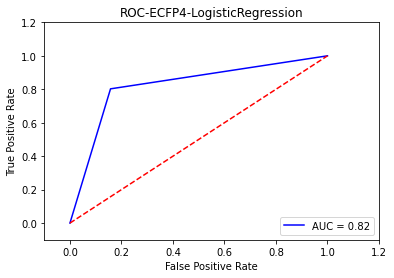

In [34]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted)
roc_auc = auc(fpr, tpr)

plt.title('ROC-ECFP4-LogisticRegression')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC.jpg", dpi = 300)
plt.show()

Average Precision Score: 0.91


Text(0.5, 1.0, '2-class Precision-Recall curve ECFP4: AP=0.91')

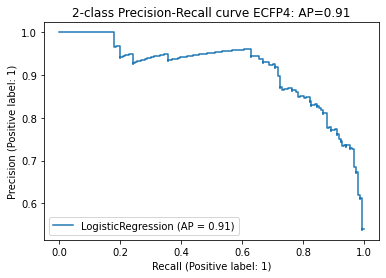

In [35]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

y_score= model.decision_function(X_test)
average_precision = average_precision_score(y_test,y_score)
print('Average Precision Score: {0:0.2f}'.format(average_precision))
disp = plot_precision_recall_curve(model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve ECFP4: AP={0:0.2f}'.format(average_precision))

In [36]:
#Test-ECFP6
X_train, X_test, y_train, y_test = model_selection.train_test_split(ECFP6, Active, test_size= Test_Size,random_state=0)
print('0:',list(y_train).count(0),list(y_test).count(0))
print('1:',list(y_train).count(1),list(y_test).count(1))

0: 611 146
1: 601 157


In [37]:
#For Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
train_ac= model.score(X_train,y_train)
test_ac= model.score(X_test,y_test)
print("Train_accuracy_score:",round(train_ac,3))
print("Test_accuracy_score:",round(test_ac,3))

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_predicted = model.predict(X_test)
f1 = f1_score(y_test,y_predicted)
print("F1 Score for logistic regression:", round(f1,3))
pres = precision_score(y_test,y_predicted)
print("Precision_Score for logistic regression:", round(pres,3))
res = recall_score(y_test,y_predicted)
print("Recall_Score for logistic regression:", round(res,3))
print("\n")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))


Train_accuracy_score: 0.996
Test_accuracy_score: 0.828
F1 Score for logistic regression: 0.831
Precision_Score for logistic regression: 0.848
Recall_Score for logistic regression: 0.815


              precision    recall  f1-score   support

           0       0.81      0.84      0.83       146
           1       0.85      0.82      0.83       157

    accuracy                           0.83       303
   macro avg       0.83      0.83      0.83       303
weighted avg       0.83      0.83      0.83       303



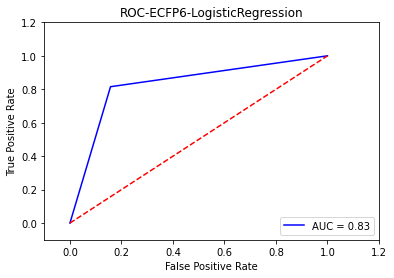

In [23]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted)
roc_auc = auc(fpr, tpr)

plt.title('ROC-ECFP6-LogisticRegression')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC.jpg", dpi = 300)
plt.show()

Average Precision Score: 0.90


Text(0.5, 1.0, '2-class Precision-Recall curve ECFP6: AP=0.90')

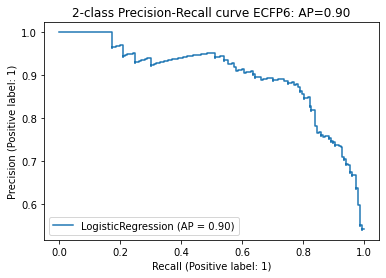

In [39]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

y_score= model.decision_function(X_test)
average_precision = average_precision_score(y_test,y_score)
print('Average Precision Score: {0:0.2f}'.format(average_precision))
disp = plot_precision_recall_curve(model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve ECFP6: AP={0:0.2f}'.format(average_precision))

In [41]:
#Test-ECFP8
X_train, X_test, y_train, y_test = model_selection.train_test_split(ECFP8, Active, test_size= Test_Size,random_state=0)
print('0:',list(y_train).count(0),list(y_test).count(0))
print('1:',list(y_train).count(1),list(y_test).count(1))

0: 611 146
1: 601 157


In [42]:
#For Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [43]:
train_ac= model.score(X_train,y_train)
test_ac= model.score(X_test,y_test)
print("Train_accuracy_score:",round(train_ac,3))
print("Test_accuracy_score:",round(test_ac,3))

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_predicted = model.predict(X_test)
f1 = f1_score(y_test,y_predicted)
print("F1 Score for logistic regression:", round(f1,3))
pres = precision_score(y_test,y_predicted)
print("Precision_Score for logistic regression:", round(pres,3))
res = recall_score(y_test,y_predicted)
print("Recall_Score for logistic regression:", round(res,3))
print("\n")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))


Train_accuracy_score: 0.998
Test_accuracy_score: 0.812
F1 Score for logistic regression: 0.818
Precision_Score for logistic regression: 0.821
Recall_Score for logistic regression: 0.815


              precision    recall  f1-score   support

           0       0.80      0.81      0.81       146
           1       0.82      0.82      0.82       157

    accuracy                           0.81       303
   macro avg       0.81      0.81      0.81       303
weighted avg       0.81      0.81      0.81       303



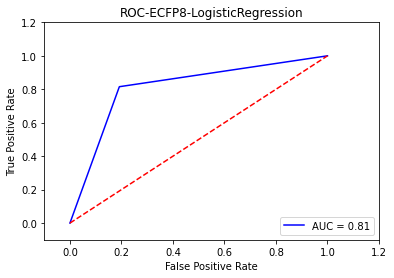

In [44]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted)
roc_auc = auc(fpr, tpr)

plt.title('ROC-ECFP8-LogisticRegression')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC.jpg", dpi = 300)
plt.show()

Average Precision Score: 0.91


Text(0.5, 1.0, '2-class Precision-Recall curve ECFP8: AP=0.91')

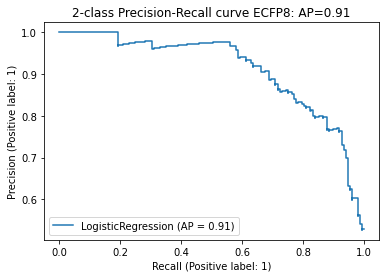

In [45]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

y_score= model.decision_function(X_test)
average_precision = average_precision_score(y_test,y_score)
print('Average Precision Score: {0:0.2f}'.format(average_precision))
disp = plot_precision_recall_curve(model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve ECFP8: AP={0:0.2f}'.format(average_precision))

In [46]:
#Test-ECFP10
X_train, X_test, y_train, y_test = model_selection.train_test_split(ECFP10, Active, test_size= Test_Size,random_state=0)
print('0:',list(y_train).count(0),list(y_test).count(0))
print('1:',list(y_train).count(1),list(y_test).count(1))

0: 611 146
1: 601 157


In [47]:
#For Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [48]:
train_ac= model.score(X_train,y_train)
test_ac= model.score(X_test,y_test)
print("Train_accuracy_score:",round(train_ac,3))
print("Test_accuracy_score:",round(test_ac,3))

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_predicted = model.predict(X_test)
f1 = f1_score(y_test,y_predicted)
print("F1 Score for logistic regression:", round(f1,3))
pres = precision_score(y_test,y_predicted)
print("Precision_Score for logistic regression:", round(pres,3))
res = recall_score(y_test,y_predicted)
print("Recall_Score for logistic regression:", round(res,3))
print("\n")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))


Train_accuracy_score: 0.998
Test_accuracy_score: 0.795
F1 Score for logistic regression: 0.797
Precision_Score for logistic regression: 0.819
Recall_Score for logistic regression: 0.777


              precision    recall  f1-score   support

           0       0.77      0.82      0.79       146
           1       0.82      0.78      0.80       157

    accuracy                           0.80       303
   macro avg       0.80      0.80      0.80       303
weighted avg       0.80      0.80      0.80       303



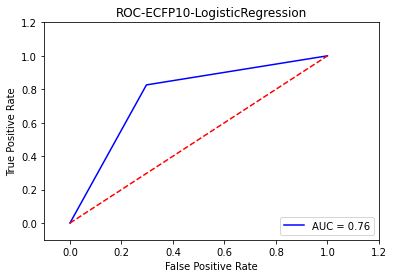

In [225]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('ROC-ECFP10-LogisticRegression')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC.jpg", dpi = 300)
plt.show()

Average Precision Score: 0.79


Text(0.5, 1.0, '2-class Precision-Recall curve ECFP10: AP=0.79')

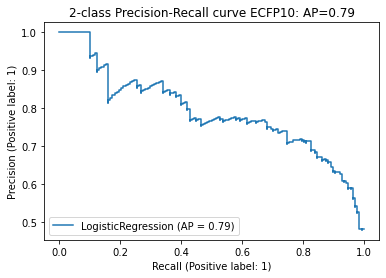

In [226]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

y_score= model.decision_function(X_test)
average_precision = average_precision_score(y_test,y_score)
print('Average Precision Score: {0:0.2f}'.format(average_precision))
disp = plot_precision_recall_curve(model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve ECFP10: AP={0:0.2f}'.format(average_precision))

In [217]:
#Test-ECFP12
X_train, X_test, y_train, y_test = model_selection.train_test_split(ECFP12, Active, test_size= Test_Size)
print('0:',list(y_train).count(0),list(y_test).count(0))
print('1:',list(y_train).count(1),list(y_test).count(1))

0: 617 140
1: 595 163


In [218]:
#For Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [219]:
train_ac= model.score(X_train,y_train)
test_ac= model.score(X_test,y_test)
print("Train_accuracy_score:",round(train_ac,3))
print("Test_accuracy_score:",round(test_ac,3))

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_predicted = model.predict(X_test)
f1 = f1_score(y_test,y_predicted)
print("F1 Score for logistic regression:", round(f1,3))
pres = precision_score(y_test,y_predicted)
print("Precision_Score for logistic regression:", round(pres,3))
res = recall_score(y_test,y_predicted)
print("Recall_Score for logistic regression:", round(res,3))
print("\n")
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))


Train_accuracy_score: 0.999
Test_accuracy_score: 0.762
F1 Score for logistic regression: 0.783
Precision_Score for logistic regression: 0.769
Recall_Score for logistic regression: 0.798


              precision    recall  f1-score   support

           0       0.75      0.72      0.74       140
           1       0.77      0.80      0.78       163

    accuracy                           0.76       303
   macro avg       0.76      0.76      0.76       303
weighted avg       0.76      0.76      0.76       303



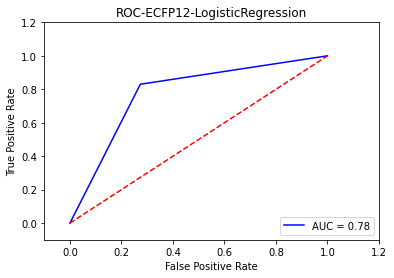

2


In [131]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('ROC-ECFP12-LogisticRegression')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("ROC.jpg", dpi = 300)
plt.show()


Average Precision Score: 0.84


Text(0.5, 1.0, '2-class Precision-Recall curve ECFP12: AP=0.84')

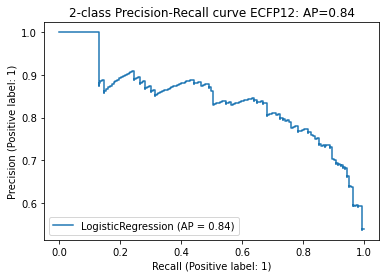

In [220]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

y_score= model.decision_function(X_test)
average_precision = average_precision_score(y_test,y_score)
print('Average Precision Score: {0:0.2f}'.format(average_precision))
disp = plot_precision_recall_curve(model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve ECFP12: AP={0:0.2f}'.format(average_precision))

In [136]:
print(y_test)
w= min(y_predicted)
w

[1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1
 0 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0
 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 1 1 1
 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0
 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0
 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0
 1 0 0 0 1 1 0]


0

In [123]:
tpr

array([0.        , 0.27333333, 1.        ])

In [124]:
fpr

array([0.        , 0.83006536, 1.        ])

In [118]:
thresholds

array([2, 1, 0])